# Phase Kickback

# 1. Exploring the $CNOT$ gate

In the previous section, we saw some very basic results with the $CNOT$ gate. Here we will explore some more interesting results.

We saw that we could entangle the two qubits by placing the control qubit in the state $|+\rangle$:

$$ \text{CNOT}|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle) $$ 

But what happens if we put the second qubit in superposition?

In [1]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
from qiskit.visualization import plot_bloch_multivector, array_to_latex

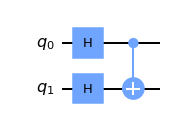

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw(output="mpl")

In the circuit above, we have the $CNOT$ acting on the state

$$ |{+}{+}\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle) $$

Since the $CNOT$ swaps the amplitudes of $|01\rangle$ and $|11\rangle$, we see no change:

<IPython.core.display.Latex object>

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


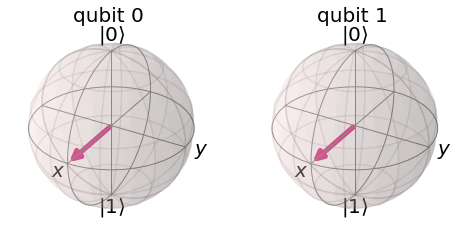

In [3]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()

final_state = sim.run(qc).result().get_statevector()

display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

Let’s put the target qubit in the state $|-\rangle$, so it has a negative phase:

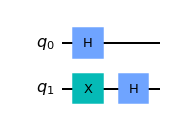

In [4]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw(output="mpl")

This creates the state:

$$ |{-}{+}\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle) $$

<IPython.core.display.Latex object>

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


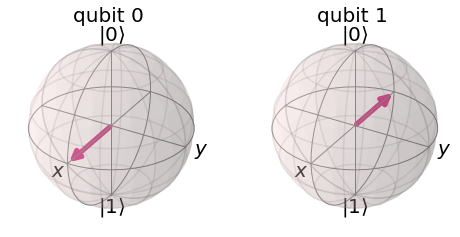

In [5]:
qc1 = qc.copy()
qc1.save_statevector()

final_state = sim.run(qc1).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

If the $CNOT$ acts on this state, we will swap the amplitudes of $|01\rangle$ and $|11\rangle$, resulting in the state:

$$ \begin{aligned}
CNOT|{-}{+}\rangle & = \tfrac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle) \\
                           & = |{-}{-}\rangle
\end{aligned} $$

This is interesting, because it affects the state of the control qubit while leaving the state of the target qubit unchanged.

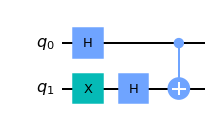

<IPython.core.display.Latex object>

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


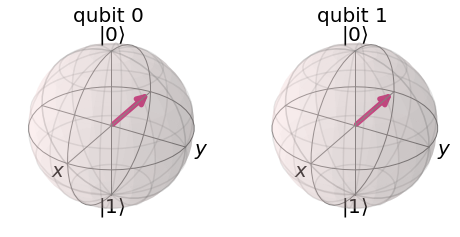

In [6]:
qc.cx(0,1)
display(qc.draw(output="mpl"))

qc.save_statevector()

final_state = sim.run(qc).result().get_statevector()

display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

We know that the $H$-gate transforms $|{+}\rangle \rightarrow |0\rangle$ and $|-\rangle \rightarrow |1\rangle$, we can see that wrapping a $CNOT$ in $H$-gates has the equivalent behaviour of a $CNOT$ acting in the opposite direction:

<div align="center"> <img src="https://qiskit.org/textbook/ch-gates/images/identities_1.svg"> </div>

We can verify this using Qiskit's Aer simulator:

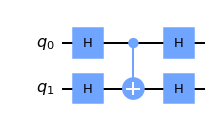

<IPython.core.display.Latex object>

In [7]:
qc = QuantumCircuit(2)

qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)

display(qc.draw(output="mpl")) 

qc.save_unitary()

unitary = sim.run(qc).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

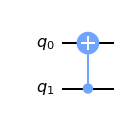

<IPython.core.display.Latex object>

In [8]:
qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw(output="mpl"))

qc.save_unitary()

unitary = sim.run(qc).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

This identity is an example of _phase kickback_, which leads us neatly on to the next section.

## 2. Phase Kickback

### 2.1 Explaining the $CNOT$ Circuit Identity

Kickback is where the eigenvalue added by a gate to a qubit is ‘kicked back’ into a different qubit via a controlled operation. For example, we saw that performing an $X$-gate on a $|-\rangle$ qubit gives it the phase −1:

$$ X|{-}\rangle = -|{-}\rangle $$

When our control qubit is in either $|0\rangle$ or $|1\rangle$, this phase affects the whole state, meaning it is a global phase which therefore has no observable effects:

$$ \begin{aligned}
\text{CNOT}|{-}0\rangle & = |{-}\rangle \otimes |0\rangle \\
                        & = |{-}0\rangle \\
                        \quad & \\
\text{CNOT}|{-}1\rangle & = X|{-}\rangle \otimes |1\rangle \\
                        & = -|{-}\rangle \otimes |1\rangle \\
                        & = -|{-}1\rangle \\
\end{aligned} $$

The interesting effect is when our control qubit is in superposition. The component of the control qubit that lies in the direction of $|1\rangle$ applies this phase factor to the corresponding target qubit. This applied phase factor in turn introduces a relative phase into the control qubit:

$$ \begin{aligned}
\text{CNOT}|{-}{+}\rangle & = \tfrac{1}{\sqrt{2}}(\text{CNOT}|{-}0\rangle + \text{CNOT}|{-}1\rangle) \\
                           & = \tfrac{1}{\sqrt{2}}(|{-}0\rangle + X|{-}1\rangle) \\
                           & = \tfrac{1}{\sqrt{2}}(|{-}0\rangle -|{-}1\rangle) \\
\end{aligned} $$

This can then be written as the two separable qubit states:

$$ \begin{aligned}
\text{CNOT}|{-}{+}\rangle & = |{-}\rangle \otimes \tfrac{1}{\sqrt{2}}(|{0}\rangle - |1\rangle )\\
                           & = |{-}{-}\rangle \\
\end{aligned} $$

Wrapping the $CNOT$ in $H$-gates transforms the qubits from the computational basis to the $\{ |+\rangle, |-\rangle \}$ basis, where we see this effect. This identity is very useful in hardware, since some hardwares only allow for $CNOT$s in one direction between two specific qubits. We can use this identity to overcome this problem and allow for $CNOT$ operations in both directions.

### 2.2 Kickback with the $T$-gate

Let’s look at another controlled operation, the controlled-$T$ gate:

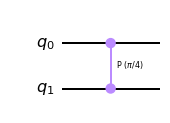

In [9]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
qc.draw(output="mpl")

The $T$-gate has the matrix:

$$ T = 
\begin{bmatrix}
1 & 0 \\
0 & e^{i\pi/4}\\
\end{bmatrix} $$

And the controlled-$T$ gate has the matrix:

$$ \text{Controlled-}T = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{i\pi/4}\\
\end{bmatrix} $$

We can verify this using Qiskit's Aer simulator:

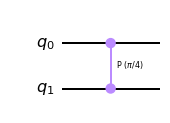

<IPython.core.display.Latex object>

In [10]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
display(qc.draw(output="mpl"))

qc.save_unitary()

unitary = sim.run(qc).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Controlled-$T$} = \n")

More generally, we can find the matrix of any controlled-$U$ operation using the rule:

$$ \begin{aligned}
U & = 
\begin{bmatrix}
u_{00} & u_{01} \\
u_{10} & u_{11}\\
\end{bmatrix} \\
\quad & \\
\text{Controlled-}U & = 
\begin{bmatrix}
I & 0 \\
0 & U\\
\end{bmatrix}
 = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & u_{00} & u_{01} \\
0 & 0 & u_{10} & u_{11}\\
\end{bmatrix}
\end{aligned} $$

Or, using Qiskit's qubit ordering: 

$$ \text{Controlled-}U =  
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & u_{00} & 0 & u_{01} \\
0 & 0 & 1 & 0 \\
0 & u_{10} & 0 & u_{11}\\
\end{bmatrix} $$ 

If we apply the $T$-gate to a qubit in the state $|1\rangle$, we add a phase of $e^{i\pi/4}$ to this qubit:

$$ T|1\rangle = e^{i\pi/4}|1\rangle $$

This is global phase and is unobservable. But if we control this operation using another qubit in the $|+\rangle$ state, the phase is no longer global but relative, which changes the relative phase in our control qubit:

$$ \begin{aligned}
|1{+}\rangle & = |1\rangle \otimes \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \\
& = \tfrac{1}{\sqrt{2}}(|10\rangle + |11\rangle) \\
& \\
\text{Controlled-}T|1{+}\rangle & = \tfrac{1}{\sqrt{2}}(|10\rangle + e^{i\pi/4}|11\rangle) \\
& \\
& = |1\rangle \otimes \tfrac{1}{\sqrt{2}}(|0\rangle + e^{i\pi/4}|1\rangle)
\end{aligned} $$

This has the effect of rotating our control qubit around the Z-axis of the Bloch sphere, while leaving the target qubit unchanged. 

Let's see this in Qiskit:

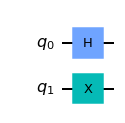

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


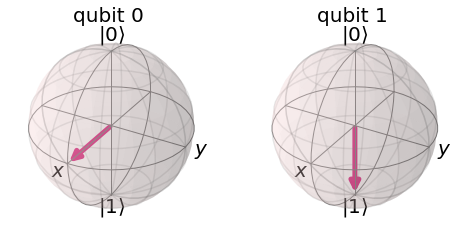

In [11]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw(output="mpl"))

qc.save_statevector()

final_state = sim.run(qc).result().get_statevector()
plot_bloch_multivector(final_state)

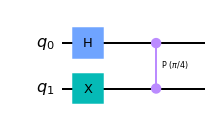

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


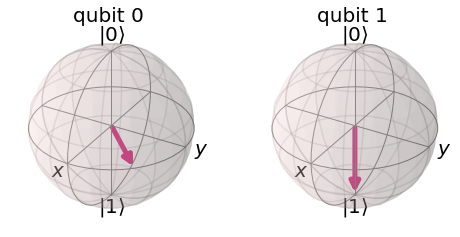

In [12]:
qc = QuantumCircuit(2)

qc.h(0)
qc.x(1)
qc.cp(pi/4, 0, 1) # add Controlled-T
display(qc.draw(output="mpl"))

qc.save_statevector()
final_state = sim.run(qc).result().get_statevector()
plot_bloch_multivector(final_state)

We can see the leftmost qubit has been rotated by $\pi/4$ around the Z-axis of the Bloch sphere as expected. After exploring this behaviour, it may become clear why Qiskit draws the controlled-$Z$ rotation gates in this symmetrical fashion (two controls instead of a control and a target). There is no clear control or target qubit for all cases.

<div align="center"> <img src="https://qiskit.org/textbook/ch-gates/images/pkb_z_equiv.svg"> </div>

With Qiskit it is possible to explore the different behaviors of this circuit's variants. 

Some examples are:

<ipython-input-13-1d920ce5893a>:4: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  qc.cu1(pi/4, 0, 1)


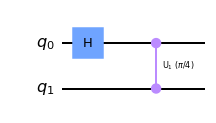

<IPython.core.display.Latex object>

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


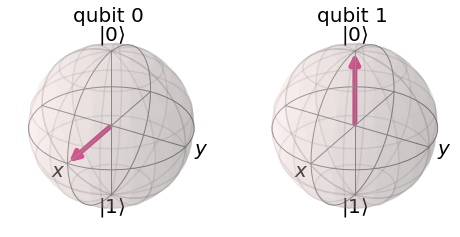

In [13]:
qc = QuantumCircuit(2)

qc.h(0)
qc.cu1(pi/4, 0, 1)

display(qc.draw(output="mpl"))

qc.save_statevector()
final_state = sim.run(qc).result().get_statevector()

display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

Meaning that the $|+\rangle$ state of $q_0$ is left unchanged after the controlled operation. This can be shown mathematically considering the input state:

$$ |0+\rangle = \tfrac{1}{\sqrt{2}} (|00\rangle + |01\rangle) = \tfrac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \\ 0 \\ 0 \end{bmatrix} $$

and applying a controlled-$T$ operation to it:

$$ \begin{aligned} \text{Controlled-}T |0+\rangle &= \tfrac{1}{\sqrt{2}} (|00\rangle + e^{i\pi/4}|01\rangle) \\ 
&= |0\rangle \otimes \tfrac{1}{\sqrt{2}} (|0\rangle + |1\rangle) = |0+\rangle \end{aligned} $$

since the $T$-gate has no effect when applied to a $|0\rangle$ state qubit. We can also verify this by matrix multiplication:

$$ \text{Controlled-}T |0+\rangle = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{i\pi/4}\\
\end{bmatrix} \tfrac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \\ 0 \\ 0 \end{bmatrix} = \tfrac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \\ 0 \\ 0 \end{bmatrix} $$ 

Another example:

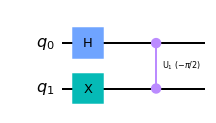

<IPython.core.display.Latex object>

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


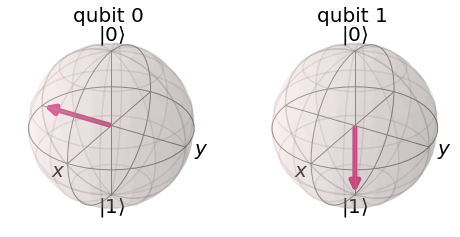

In [14]:
qc = QuantumCircuit(2)

qc.h(0)
qc.x(1)

qc.cu1(-pi/2, 0, 1)

display(qc.draw(output="mpl"))

qc.save_statevector()
final_state = sim.run(qc).result().get_statevector()

display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

This time, the $|1\rangle$ state of the target qubit is left unchanged, while the control has been transformed into $|\circlearrowright\rangle$. Just as before, we can predict this effect on the input state

$$ |1+\rangle = \tfrac{1}{\sqrt{2}} (|01\rangle + |11\rangle) $$

with a controlled-$S^\dagger$ operation, which we can interpret as $S^\dagger = P(-\pi/2)$:

$$ \begin{aligned}
\text{Controlled-}S^\dagger |1+\rangle &= \tfrac{1}{\sqrt{2}} (|10\rangle + e^{-i\pi/2}|11\rangle) \\
&= |1\rangle \otimes \tfrac{1}{\sqrt{2}} (|0\rangle + e^{-i\pi/2} |1\rangle)
\end{aligned} $$

which translates to the control qubit being given a phase of $-i$, which, starting from the $|+\rangle$ state, ends up to $|\circlearrowright\rangle = \tfrac{1}{\sqrt{2}} (|0\rangle -i|1\rangle) $. Multiplying matrices also gives:

$$ \text{Controlled-}S^\dagger |1+\rangle = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{-i\pi/2}\\
\end{bmatrix} \tfrac{1}{\sqrt{2}} \begin{bmatrix} 0 \\ 0 \\ 1 \\ 1 \end{bmatrix} = \tfrac{1}{\sqrt{2}} \begin{bmatrix} 0 \\ 0 \\ 1 \\ e^{-i\pi/2} \end{bmatrix} $$ 

Finally, we take into consideration the following circuit:

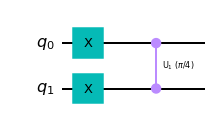

<IPython.core.display.Latex object>

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


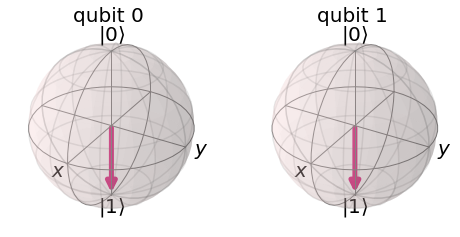

In [15]:
qc = QuantumCircuit(2)

qc.x([0, 1])
qc.cu1(pi/4, 0, 1)

display(qc.draw(output="mpl"))

qc.save_statevector()
final_state = sim.run(qc).result().get_statevector()

display(array_to_latex(final_state, prefix="\\text{Statevector} = "))
plot_bloch_multivector(final_state)

In this case, the states of both qubits have been left unchanged to the starting $|1\rangle$ state. This is beacause 

$$ \text{Controlled-}T |11\rangle = e^{\pi/4} |11\rangle $$

i.e., the induced transformation acted solely on the global phase, which we cannot detect, leaving us with the overall state we started with.